In [2]:
from tidyverse.dummy import *
import scanpy as sc
from sctools.scplotting import recolor
from matplotlib_inline.backend_inline import set_matplotlib_formats

plt.rcParams['svg.fonttype'] = 'none'
import os

import sys
sys.path.append('..')
from util import load_original_data
from colormaps import color_dict_coarse_celltype, color_dict_diagnosis

In [3]:
set_matplotlib_formats('png')

In [3]:
adata = load_original_data()

In [4]:
plotfolder = '/tmp/fig1_umaps'
if not os.path.exists(plotfolder):
    os.mkdir(plotfolder)

In [5]:
adata.layers['counts'] = adata.X

In [6]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

In [7]:
cluster_order = [
    'Columnar Epithelium', 
    'Squamous Epithelium',
    'Bcells', 
    'Tcells',
    'Mast cells', 
    'Myeloid',
    'Endothelial cells', 
    'Fibroblasts',
    'Myofibroblasts',
]
adata.obs['celltype_split'] = pd.Categorical(adata.obs['celltype_split'], cluster_order) 
recolor(adata, 'celltype_split', color_dict_coarse_celltype)

In [8]:
adata

AnnData object with n_obs × n_vars = 117792 × 35606
    obs: 'samplename', 'n_genes', 'n_molecules', 'doublet_score', 'percent_mito', 'leiden', 'diagnosis', 'phase', 'patient', 'procedure', 'hcl_refined', 'hcl_score', 'CLid', 'CL_name', 'nobatch_leiden', 'tissue_split', 'celltype_split', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'is_mito', 'is_ribo', 'old_genename'
    uns: 'diagnosis_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'log_X', 'log_raw.X', 'louvain', 'neighbors', 'nobatch', 'nobatch_leiden_colors', 'nobatch_leiden_sizes', 'nobatch_rank_genes_groups', 'nobatch_rank_genes_groups_filtered', 'nobatch_rank_genes_groups_unfiltered', 'paga', 'pca', 'rank_genes_groups', 'rank_genes_groups_filtered', 'rank_genes_groups_unfiltered', 'umap', 'log1p', 'celltype_split_colors'
    obsm: 'X_pca', 'X_pca_original', 'X_umap', 'X_umap_nobatch'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'nobatch_connectivities', 'nobatch_distances'

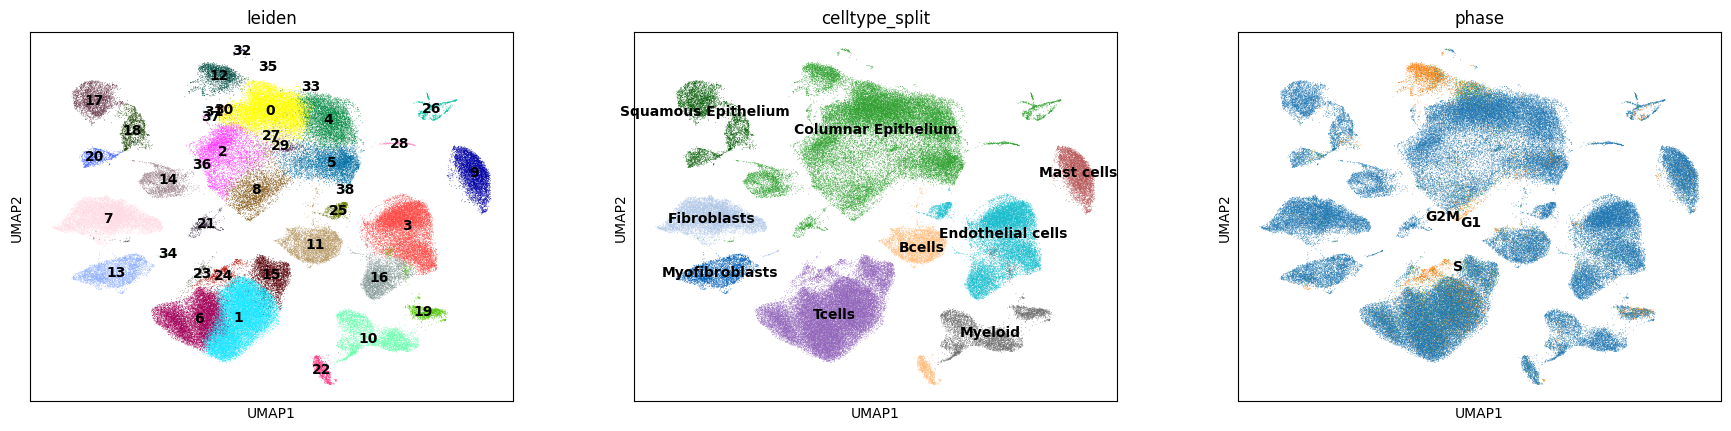

In [9]:
sc.pl.umap(adata, color=['leiden', 'celltype_split', 'phase'], legend_loc='on data', size=1)

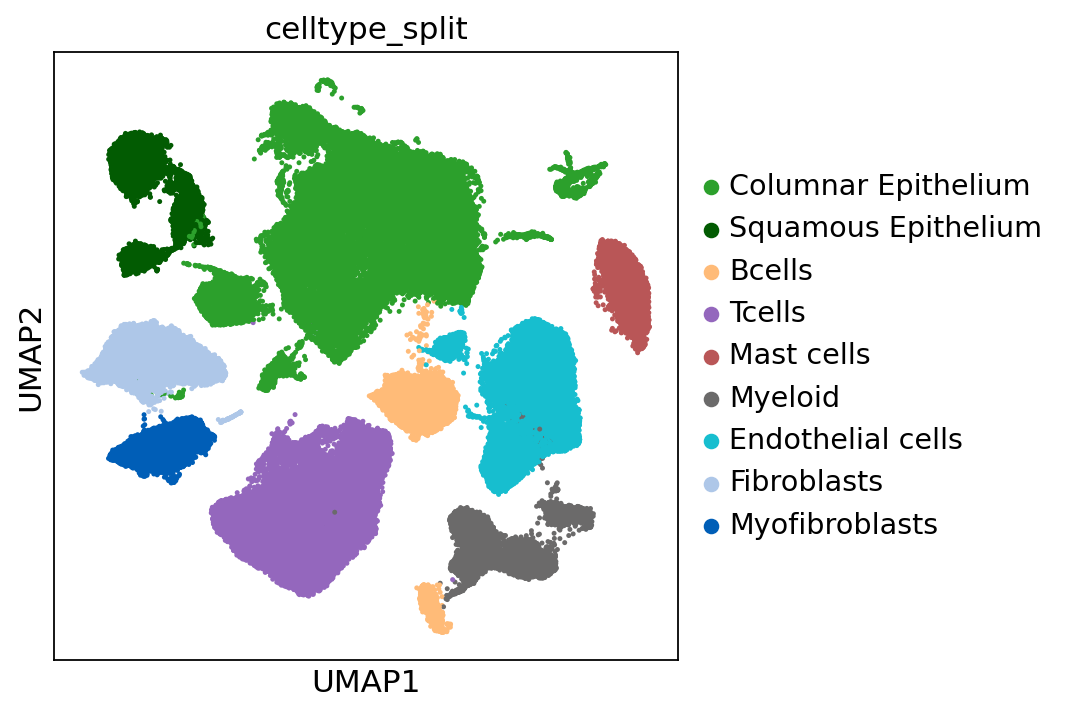

In [10]:
sc.set_figure_params(figsize = (5,5))
sc.pl.umap(adata, color=['celltype_split'], size=20, show=False)
plt.savefig(f'{plotfolder}/umap_coarse.png')

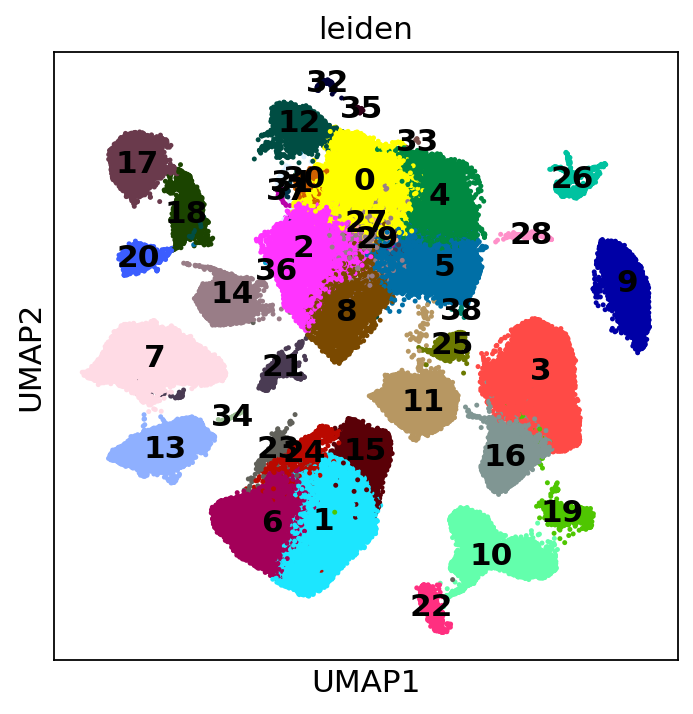

In [11]:
sc.set_figure_params(figsize = (5,5))
sc.pl.umap(adata, color=['leiden'], size=20, legend_loc='on data', show=False)
plt.savefig(f'{plotfolder}/umap_leiden.png')

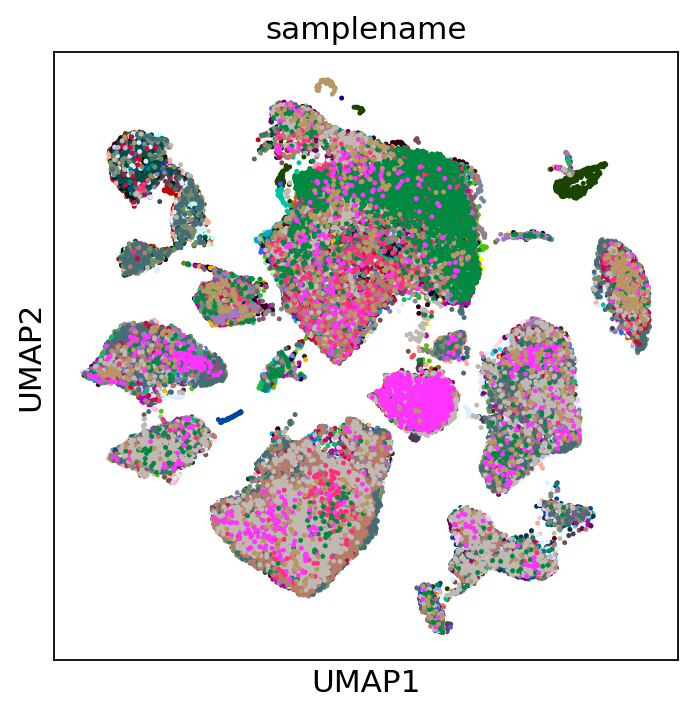

In [12]:
sc.set_figure_params(figsize = (5,5))
sc.pl.umap(adata, color=['samplename'], size=20, legend_loc='none', show=False)
plt.savefig(f'{plotfolder}/umap_patient.png')

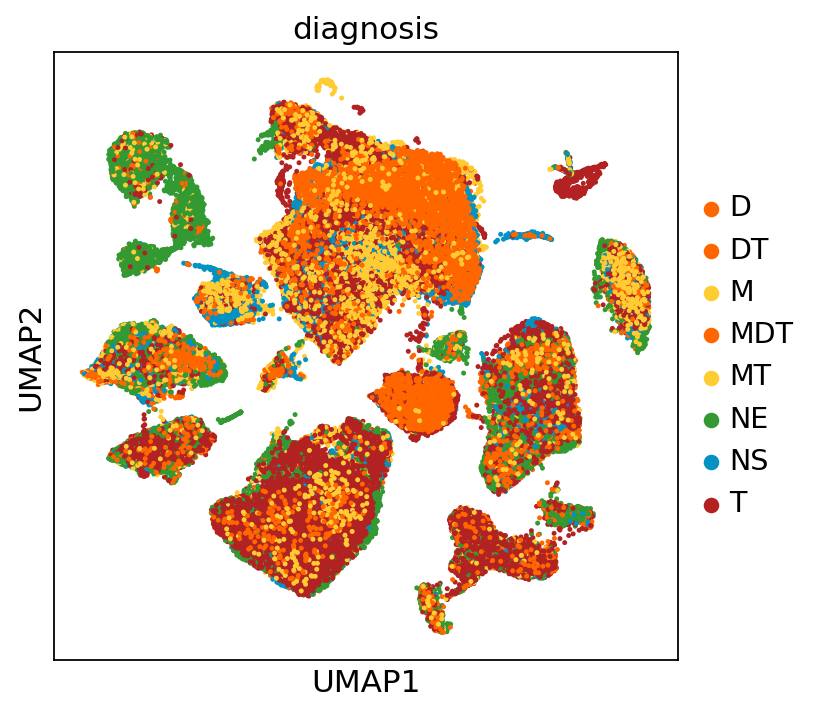

In [13]:
sc.set_figure_params(figsize = (5,5))
sc.pl.umap(adata, color=['diagnosis'], size=20, show=False, palette=color_dict_diagnosis)
plt.savefig(f'{plotfolder}/umap_diag.png')

# Markers 

In [14]:
coarse_markers = {
 'Columnar Epithelium': ['EPCAM','KRT8'],
 'Squamous Epithelium': ['KRT6A', 'KRT13'],
 'B/Plasma cells': ['CD79A'],
 'T/NK cells': ['CD3D', 'PTPRC'],
 'Mast cells': ['TPSAB1'], 
 'Myeloid': ['FCER1G'],
 'Endothelial cells': ['PECAM1'],
 'Fibroblasts': ['DCN','PDGFRA'],
 'Myofibroblasts': ['ACTA2','NOTCH3'],
}

/tmp/ipykernel_153023/2293257979.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
/tmp/ipykernel_153023/2293257979.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


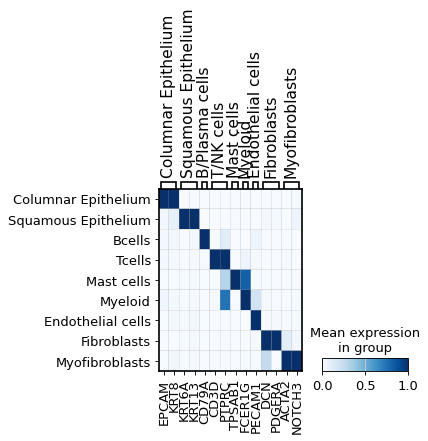

In [15]:
set_matplotlib_formats('svg')
sc.pl.matrixplot(adata, var_names=coarse_markers, groupby='celltype_split', standard_scale='var', swap_axes=False, show=False, #order=cluster_order
                figsize=(4,3), cmap='Blues', dendrogram=False);

plt.savefig(f'{plotfolder}/markers_matrix.svg')
set_matplotlib_formats('png')

## Fine grained cell types

In [16]:
df_fine = pd.read_csv('../EsoAtlas_fine_grain_celltypes.csv.gz', index_col=0)[['Fine_Grained_Label']]

In [17]:
adata.obs = adata.obs.merge(df_fine[['Fine_Grained_Label']], left_index=True, right_index=True)

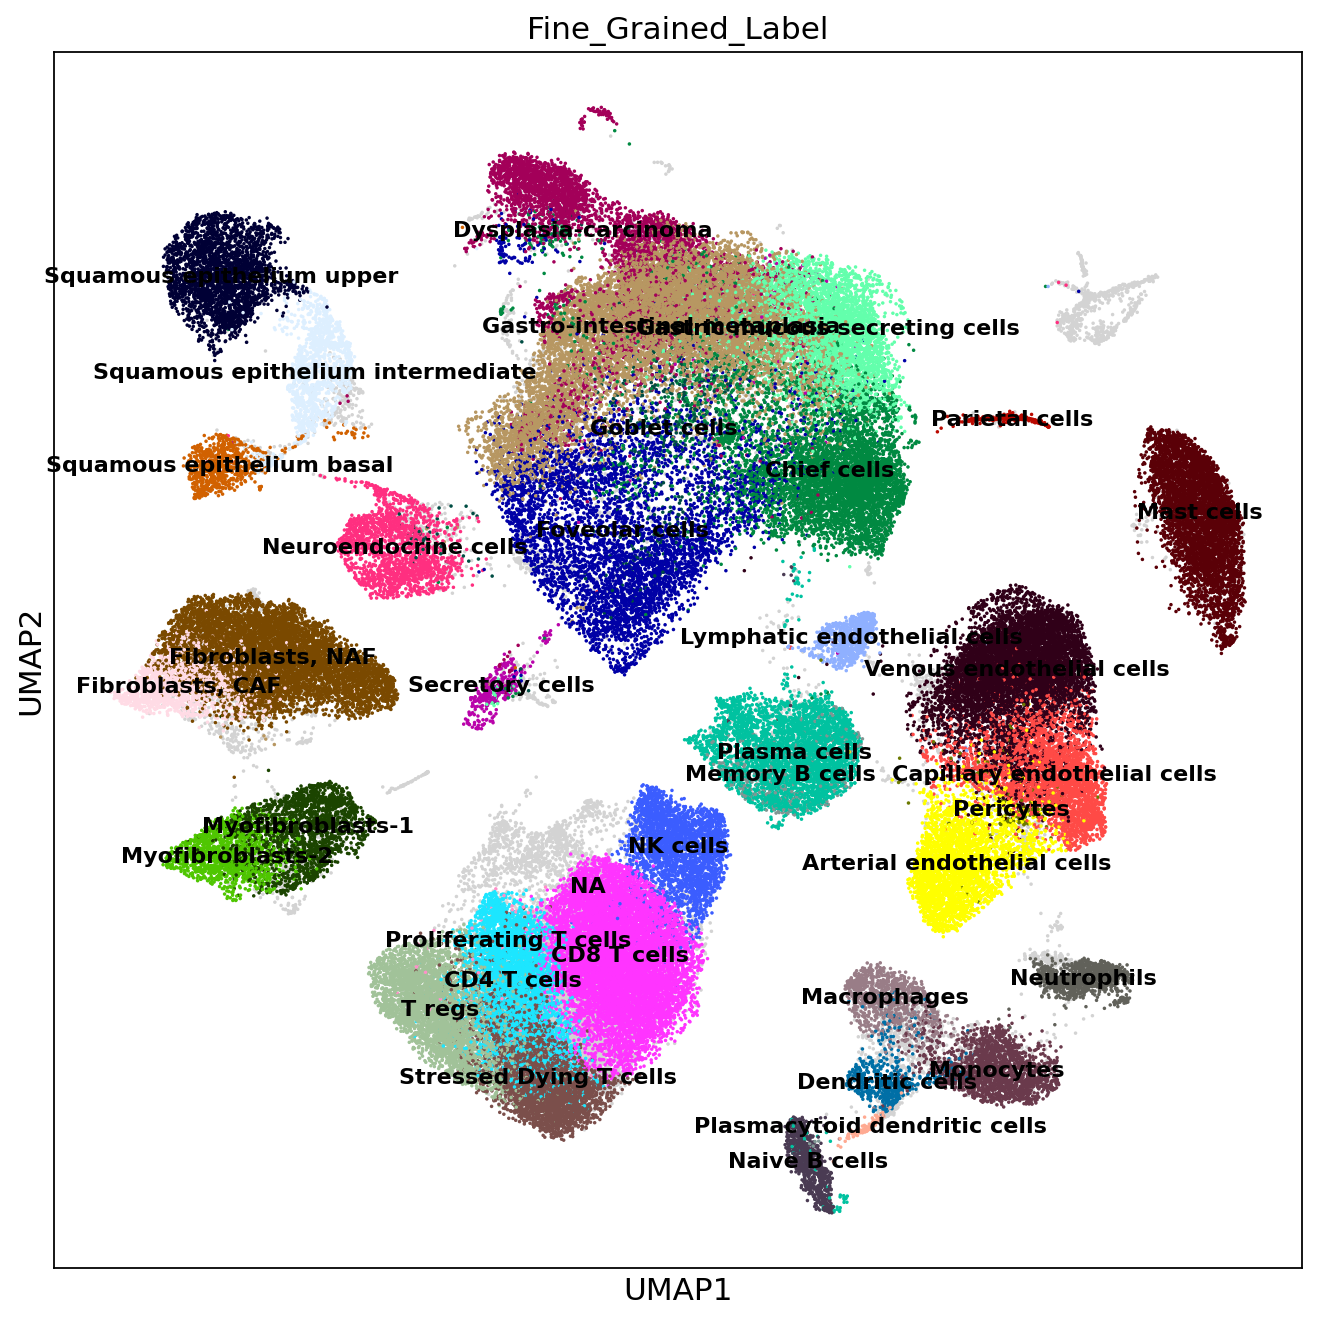

In [18]:
sc.set_figure_params(figsize = (10,10))
sc.pl.umap(adata, color=['Fine_Grained_Label'], legend_loc='on data', size=10, legend_fontsize=10)

In [19]:
## some are missing
adata.obs['Fine_Grained_Label'] = adata.obs.Fine_Grained_Label.astype(str)
adata.obs.loc[adata.obs.query('nobatch_leiden =="31"').index, "Fine_Grained_Label"] = 'Hepatoid'
adata.obs.loc[adata.obs.query('leiden=="12"').index, "Fine_Grained_Label"] = 'Proliferating Epithelium'

In [20]:
order = [
    'Squamous epithelium intermediate',
    'Squamous epithelium upper',
    'Squamous epithelium basal',
    'Glandular cell of esophagus',
    
    'Parietal cells',
    'Endocrine cells',
    'Chief cells',
    'Goblet cells' ,
    'Foveolar cells',
    'Neck cells',
    'Gastro-intestinal metaplasia',
    'Hepatoid',
    'Proliferating Epithelium',
    
    'NK cells',
    'CD4 T cells',
    'T regs',
    'CD8 T cells',
    'Proliferating T cells',
    
    'B cells',
    'Plasma cells' ,
    
    'Mast cells',
    
    'Neutrophils',
    'Plasmacytoid dendritic cells',
    'Dendritic cells',
    'Monocytes',
    'Macrophages',
    
    'Capillary endothelial cells',
    'Arterial endothelial cells',
    'Venous endothelial cells',
    'Lymphatic endothelial cells',
    
    'Myofibroblasts-1',
    'Myofibroblasts-2',
    
    'Fibroblasts 2',
    'Fibroblasts 1',
]

renames = {
    'Gastric mucous secreting cells': 'Neck cells',
    'Secretory cells': 'Glandular cell of esophagus',
    'Neuroendocrine cells':	 'Endocrine cells',
    'Fibroblasts, NAF':'Fibroblasts 2',
    'Fibroblasts, CAF':	'Fibroblasts 1',
    'Naive B cells':	'B cells',
    'Memory B cells':	'B cells',
}

adata.obs['Fine_Grained_Label2'] =  adata.obs['Fine_Grained_Label'].apply(lambda x: renames[x] if x in renames else x)
adata.obs['Fine_Grained_Label2'] = pd.Categorical(adata.obs['Fine_Grained_Label2'], order)

/tmp/ipykernel_153023/1660567786.py:58: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
/tmp/ipykernel_153023/1660567786.py:62: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


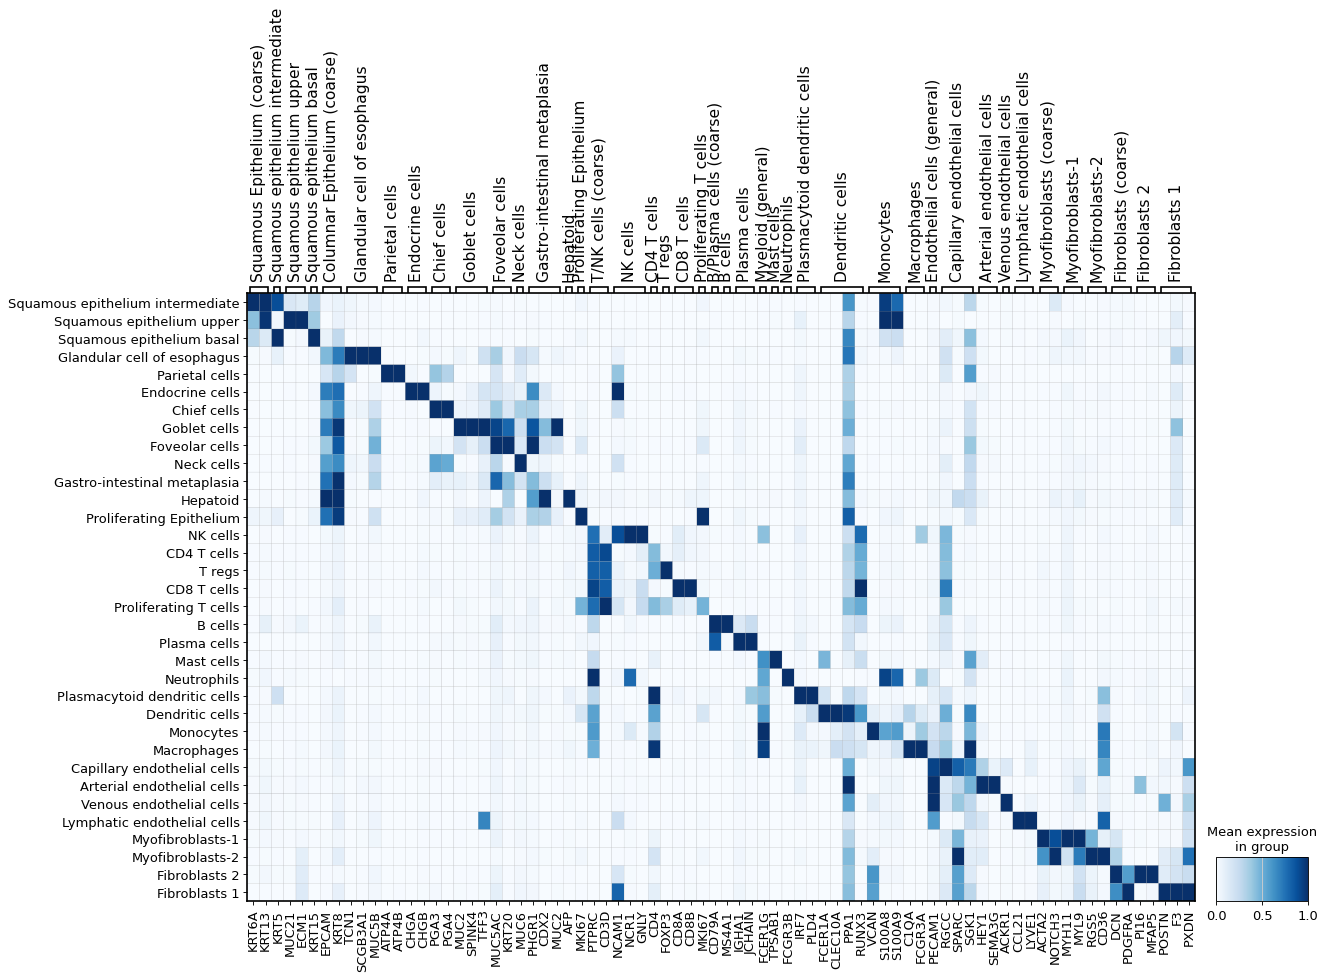

In [21]:
coarse_fine_markers = {

    'Squamous Epithelium (coarse)': ['KRT6A', 'KRT13'],
    'Squamous epithelium intermediate': ['KRT5'],
    'Squamous epithelium upper': ['MUC21', 'ECM1'],
    'Squamous epithelium basal': ['KRT15'],
    
    'Columnar Epithelium (coarse)': ['EPCAM','KRT8'],
    'Glandular cell of esophagus': ['TCN1', 'SCGB3A1', 'MUC5B'],
    'Parietal cells': ['ATP4A','ATP4B'],
    'Endocrine cells': ['CHGA','CHGB'], ## Nowicki-Osuch
    'Chief cells': ['PGA3','PGA4'],
    'Goblet cells' : ['MUC2','SPINK4','TFF3'], ## Nowicki-Osuch
    'Foveolar cells': ['MUC5AC', 'KRT20'], ## Nowicki-Osuch
    'Neck cells': ['MUC6'], 
    'Gastro-intestinal metaplasia':['PHGR1', 'CDX2', 'MUC2'],
    'Hepatoid': ['AFP'],
    'Proliferating Epithelium': ['MKI67'],

    'T/NK cells (coarse)': ['PTPRC', 'CD3D'],
    'NK cells': ['NCAM1', 'NCR1', 'GNLY'],
    'CD4 T cells': ['CD4'],
    'T regs': ['FOXP3'],
    'CD8 T cells': ['CD8A', 'CD8B'],
    'Proliferating T cells':  ['MKI67'],

    'B/Plasma cells (coarse)': ['CD79A'],
    'B cells': ['MS4A1'],
    'Plasma cells' : ['IGHA1', 'JCHAIN'],
    

    'Myeloid (general)': ['FCER1G'],
    'Mast cells': ['TPSAB1'],

    'Neutrophils': ['FCGR3B'],
    'Plasmacytoid dendritic cells': ['IRF7', 'PLD4'],
    'Dendritic cells': ['FCER1A', 'CLEC10A', 'PPA1','RUNX3'],
    'Monocytes': ['VCAN','S100A8','S100A9'],
    'Macrophages': ['C1QA','FCGR3A'],
    
     'Endothelial cells (general)': ['PECAM1'],
    'Capillary endothelial cells': ['VWA1', 'PLVAP'],
    'Capillary endothelial cells': ['RGCC', 'SPARC', 'SGK1'],
    
    'Arterial endothelial cells': ['HEY1', 'SEMA3G'],
    'Venous endothelial cells': ['ACKR1'],
    'Lymphatic endothelial cells': ['CCL21', 'LYVE1'],
    
    'Myofibroblasts (coarse)': ['ACTA2','NOTCH3'],
    'Myofibroblasts-1': ['MYH11','MYL9'] ,
    'Myofibroblasts-2': ['RGS5', 'CD36'] ,
    
    'Fibroblasts (coarse)': ['DCN','PDGFRA'],
    'Fibroblasts 2': ['PI16', 'MFAP5'],
    'Fibroblasts 1': ['POSTN', 'F3','PXDN'],
}

set_matplotlib_formats('svg')
sc.pl.matrixplot(adata, var_names=coarse_fine_markers, groupby='Fine_Grained_Label2', standard_scale='var', swap_axes=False, show=False, use_raw=False, #order=cluster_order
                figsize=(17,10), cmap='Blues', dendrogram=False);
plt.savefig(f'{plotfolder}/markers_matrix_fine_and_coarse.svg')
set_matplotlib_formats('png')

# Export counts for Table S5

In [ ]:
import pertpy as pt
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="Fine_Grained_Label2",
    # cell_type_identifier="leiden",
    sample_identifier="samplename",
    covariate_obs=['samplename','diagnosis', 'procedure', 'patient'],
)
cdata_fine = sccoda_data['coda']
df_fine = cdata_fine.to_df()
df_fine.to_csv('/tmp/S5_fine.csv')

In [ ]:
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="celltype_split",
    # cell_type_identifier="leiden",
    sample_identifier="samplename",
    covariate_obs=['samplename','diagnosis', 'procedure', 'patient'],
)
cdata_coarse = sccoda_data['coda']
df_coarse = cdata_coarse.to_df()
df_coarse.to_csv('/tmp/S5_coarse.csv')